In [1]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\65777\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\65777\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\65777\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
# Step 1: Load Reviews Dataset
df = pd.read_csv(r'D:\Project\skripsi-main\content\dataset.csv')
print("Original Dataset:")
print(df.head())
print("\n")

Original Dataset:
          userName                   at  \
0  Pengguna Google  2024-12-09 16:44:17   
1  Pengguna Google  2024-12-09 16:43:28   
2  Pengguna Google  2024-12-09 16:42:58   
3  Pengguna Google  2024-12-09 16:42:09   
4  Pengguna Google  2024-12-09 16:41:58   

                                             content  
0                                         Bagus👍👍👍👍👍  
1  Knp wondr by BNI tidak bisa dibuka ya keterang...  
2                           Aplikasi sering eror....  
3  Kalau pembaruan itu kasih info donk,,,,jngan m...  
4           Parah wondr bni, dikit2 trobel, gangguan  




In [7]:
# Step 2: Load InSet Lexicon
# Assuming your column is named "word"
positive_words = set(pd.read_csv(r'D:\Project\skripsi-main\content\positive.csv')['word'].tolist())
negative_words = set(pd.read_csv(r'D:\Project\skripsi-main\content\negative.csv')['word'].tolist())
print("Positive Words:")
print(list(positive_words))
print(f"Total Positive Keywords: {len(positive_words)}")
print("\nNegative Words:")
print(list(negative_words))
print(f"Total Negative Keywords: {len(negative_words)}")
print("\n")

Positive Words:
['digdaya', 'berpandangan', 'tenggang rasa', 'kekerabatan', 'mengucil', 'kepuasan', 'memolakan', 'senyumnya', 'gambir', 'mengesankan', 'tayibah', 'mewisuda', 'makasih', 'manjur', 'bergema', 'bersulur', 'membaca', 'ulasan', 'berpasrah', 'ok', 'kenek', 'gangsar', 'portofolio', 'prasetia', 'keterbukaan', 'bersengat', 'selaras', 'gatra', 'berseni', 'mengenyam', 'bijak', 'konstelasi', 'selengkapnya', 'terbayang-bayang', 'cawis', 'resep', 'ukur', 'terpana', 'kekaguman', 'wisma', 'nyanyian', 'memegang kitab', 'hastag', 'cinta kasih', 'purusa', 'peka', 'kekal', 'rizki', 'pasuk', 'menakjubkan', 'raih', 'refresh', 'model', 'buru', 'perbincangan', 'kias', 'mesem', 'sekah', 'rintis', 'senyuman', 'berpendidikan', 'berbagai', 'gila', 'cucu Adam', 'mengantisipasi', 'pose', 'keputusan', 'mengiler', 'bentur', 'tertarik', 'peran serta', 'penghargaan', 'pukauan', 'melipur', 'jempol', 'top', 'menelaah', 'atur', 'indikasi', 'sempena hati', 'adi', 'hilang', 'amal', 'kesetiaan', 'menyeberangi

In [10]:
# Step 3: Load Slang to Formal Dataset
print("=== Step 3: Load Slang to Formal Dataset ===")
slang_dict = pd.read_csv(r'D:\Project\skripsi-main\content\Slangword-indonesian.csv').set_index('slang')['formal'].to_dict()
print("Slang Dictionary:", slang_dict)
print("\n")

=== Step 3: Load Slang to Formal Dataset ===
Slang Dictionary: {'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa', 'eeeehhhh': 'eh', 'kata2nyaaa': 'kata-katanya', 'hallo': 'halo', 'kaka': 'kakak', 'ka': 'kak', 'daah': 'dah', 'aaaaahhhh': 'ah', 'yaa': 'ya', 'smga': 'semoga', 'slalu': 'selalu', 'amiin': 'amin', 'kk': 'kakak', 'trus': 'terus', 'sii': 'sih', 'nyenengin': 'menyenangkan', 'bgt': 'banget', 'gemess': 'gemas', 'akuuu': 'aku', 'jgn': 'jangan', 'udah': 'sudah', 'gitu': 'begitu', 'aja': 'saja', 'gemesiin': 'menggemaskan', 'menyenangkn': 'menyenangkan', 'rb': 'ribu', 'akau': 'aku', 'saranin': 'menyarankan', 'nemuin': 'menemukan', 'yah': 'ya', 'mnis2nya': 'manis-manisnya', 'gtu': 'begitu', 'tu': 'itu', 'idolaa': 'idola', 'bangett': 'banget', 'kaakk': 'kak', 'baaiikkk': 'baik', 'telaatt': 'telat', 'kaak': 'kak', 'yg': 'yang', 'lg': 'lagi', 'skarang': 'sekarang', 'sempet': 'sempat', 'karna': 'karena', 'ngga': 'enggak', 'mantep': 'mantap', 'lo

In [12]:
import pandas as pd
import os

# Pastikan DataFrame df sudah ada
# df = pd.read_csv('path_to_your_csv.csv') # Jika Anda memuat dataset dari file

# Step 1: Case Folding
# Membuat direktori jika belum ada
os.makedirs('/mnt/data', exist_ok=True)

# Membuat kolom 'case_folding' yang berisi konten yang sudah diubah menjadi huruf kecil
df['case_folding'] = df['content'].str.lower()

# Tentukan path untuk menyimpan output
case_folding_path = '/mnt/data/case_folding_output.csv'

# Menyimpan DataFrame yang hanya berisi kolom 'content' dan 'case_folding'
df[['content', 'case_folding']].to_csv(case_folding_path, index=False)

print("Setelah Case Folding:")
print(df[['content', 'case_folding']])


Setelah Case Folding:
                                                content  \
0                                            Bagus👍👍👍👍👍   
1     Knp wondr by BNI tidak bisa dibuka ya keterang...   
2                              Aplikasi sering eror....   
3     Kalau pembaruan itu kasih info donk,,,,jngan m...   
4              Parah wondr bni, dikit2 trobel, gangguan   
...                                                 ...   
2495        Sangat membantu mudah di gunakan dan simpel   
2496  Mempermudah hidup Bagus mudah transaksi dengan...   
2497  Aplikasi wondr tampilannya kekiniaan banget, m...   
2498  aplikasinya sangat mudah digunakan. fiturnya s...   
2499  Biometrik buat loginnya gabisa dipake apdahal ...   

                                           case_folding  
0                                            bagus👍👍👍👍👍  
1     knp wondr by bni tidak bisa dibuka ya keterang...  
2                              aplikasi sering eror....  
3     kalau pembaruan itu kasih info 

In [13]:
# Step 2: Cleansing
def cleansing(text):
    return re.sub(r'[^a-z\s]', '', text)

df['cleansing'] = df['case_folding'].apply(cleansing)
print("\nAfter Cleansing:")
print(df[['case_folding', 'cleansing']])

# Menyimpan hasil Step 2: Cleansing bersama dengan content dan case_folding ke file CSV
cleansing_with_context_path = '/mnt/data/cleansing_with_context_output.csv'
df[['content', 'case_folding', 'cleansing']].to_csv(cleansing_with_context_path, index=False)


After Cleansing:
                                           case_folding  \
0                                            bagus👍👍👍👍👍   
1     knp wondr by bni tidak bisa dibuka ya keterang...   
2                              aplikasi sering eror....   
3     kalau pembaruan itu kasih info donk,,,,jngan m...   
4              parah wondr bni, dikit2 trobel, gangguan   
...                                                 ...   
2495        sangat membantu mudah di gunakan dan simpel   
2496  mempermudah hidup bagus mudah transaksi dengan...   
2497  aplikasi wondr tampilannya kekiniaan banget, m...   
2498  aplikasinya sangat mudah digunakan. fiturnya s...   
2499  biometrik buat loginnya gabisa dipake apdahal ...   

                                              cleansing  
0                                                 bagus  
1     knp wondr by bni tidak bisa dibuka ya keterang...  
2                                  aplikasi sering eror  
3     kalau pembaruan itu kasih info donk

In [15]:
import pandas as pd
import os

# Step 3: Spelling Normalization
# Membuat dictionary dari dataset slang dan formal
file_path = r'D:\Project\skripsi-main\content\Slangword-indonesian.csv'
slang_dict = dict(zip(pd.read_csv(file_path)['slang'], pd.read_csv(file_path)['formal']))

def normalize_spelling(text):
    words = text.split()
    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    return ' '.join(normalized_words)

df['normalized_reviews'] = df['cleansing'].apply(normalize_spelling)
print("\nAfter Spelling Normalization:")
print(df[['cleansing', 'normalized_reviews']])

# Menyimpan hasil Step 3: Spelling Normalization bersama dengan content, case_folding, dan cleansing
spelling_normalization_path = r'D:\Project\skripsi-main\content\spelling_normalization_with_context_output.csv'
df[['content', 'case_folding', 'cleansing', 'normalized_reviews']].to_csv(spelling_normalization_path, index=False)



After Spelling Normalization:
                                              cleansing  \
0                                                 bagus   
1     knp wondr by bni tidak bisa dibuka ya keterang...   
2                                  aplikasi sering eror   
3     kalau pembaruan itu kasih info donkjngan main ...   
4                 parah wondr bni dikit trobel gangguan   
...                                                 ...   
2495        sangat membantu mudah di gunakan dan simpel   
2496  mempermudah hidup bagus mudah transaksi dengan...   
2497  aplikasi wondr tampilannya kekiniaan banget me...   
2498  aplikasinya sangat mudah digunakan fiturnya sa...   
2499  biometrik buat loginnya gabisa dipake apdahal ...   

                                     normalized_reviews  
0                                                 bagus  
1     kenapa wondr by bni tidak bisa dibuka ya keter...  
2                                  aplikasi sering eror  
3     kalau pembaruan itu ka

In [16]:
# Step 4: Tokenizing
def tokenizing(text):
    return word_tokenize(text)

df['tokenizing'] = df['normalized_reviews'].apply(tokenizing)
print("\nAfter Tokenizing:")
print(df[['normalized_reviews', 'tokenizing']])

# Menyimpan hasil Step 4: Tokenizing bersama dengan context
tokenizing_path = '/mnt/data/tokenizing_with_context_output.csv'
df[['content', 'case_folding', 'cleansing', 'normalized_reviews', 'tokenizing']].to_csv(tokenizing_path, index=False)



After Tokenizing:
                                     normalized_reviews  \
0                                                 bagus   
1     kenapa wondr by bni tidak bisa dibuka ya keter...   
2                                  aplikasi sering eror   
3     kalau pembaruan itu kasih info donkjngan main ...   
4                 parah wondr bni dikit trobel gangguan   
...                                                 ...   
2495        sangat membantu mudah di gunakan dan simpel   
2496  mempermudah hidup bagus mudah transaksi dengan...   
2497  aplikasi wondr tampilannya kekiniaan banget me...   
2498  aplikasinya sangat mudah digunakan fiturnya sa...   
2499  biometrik buat loginnya enggak bisa dipakai ap...   

                                             tokenizing  
0                                               [bagus]  
1     [kenapa, wondr, by, bni, tidak, bisa, dibuka, ...  
2                              [aplikasi, sering, eror]  
3     [kalau, pembaruan, itu, kasih, inf

In [17]:
# Step 5: Stopwords Removal
stop_words = set(stopwords.words('indonesian'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['stopwords_removed'] = df['tokenizing'].apply(remove_stopwords)
print("\nAfter Stopwords Removal:")
print(df[['tokenizing', 'stopwords_removed']])

# Menyimpan hasil Step 5: Stopwords Removal bersama context
stopwords_removal_path = '/mnt/data/stopwords_removal_with_context_output.csv'
df[['content', 'case_folding', 'cleansing', 'normalized_reviews', 'tokenizing', 'stopwords_removed']].to_csv(stopwords_removal_path, index=False)


After Stopwords Removal:
                                             tokenizing  \
0                                               [bagus]   
1     [kenapa, wondr, by, bni, tidak, bisa, dibuka, ...   
2                              [aplikasi, sering, eror]   
3     [kalau, pembaruan, itu, kasih, info, donkjngan...   
4          [parah, wondr, bni, dikit, trobel, gangguan]   
...                                                 ...   
2495  [sangat, membantu, mudah, di, gunakan, dan, si...   
2496  [mempermudah, hidup, bagus, mudah, transaksi, ...   
2497  [aplikasi, wondr, tampilannya, kekiniaan, bang...   
2498  [aplikasinya, sangat, mudah, digunakan, fiturn...   
2499  [biometrik, buat, loginnya, enggak, bisa, dipa...   

                                      stopwords_removed  
0                                               [bagus]  
1     [wondr, by, bni, dibuka, ya, keterangan, nya, ...  
2                                      [aplikasi, eror]  
3     [pembaruan, kasih, info, do

In [ ]:
!pip install Sastrawi

# Import the Sastrawi stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer object
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Step 6: Stemming using Sastrawi
def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df['stemming'] = df['stopwords_removed'].apply(stemming)
print("\nAfter Stemming:")
print(df[['stopwords_removed', 'stemming']])

# Menyimpan hasil Step 6: Stemming ke file CSV
stemming_path = '/mnt/data/stemming_with_context_output.csv'
df[['content', 'case_folding', 'cleansing', 'normalized_reviews', 'tokenizing', 'stopwords_removed', 'stemming']].to_csv(stemming_path, index=False)


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


ModuleNotFoundError: No module named 'Sastrawi'

In [ ]:
# Step 4: Label Sentiment Using Lexicon
def label_sentiment(text):
    # No need to split here as 'text' is already a list of words
    positive_score = sum(1 for word in text if word in positive_words)
    negative_score = sum(1 for word in text if word in negative_words)
    polarity = positive_score - negative_score
    if polarity > 0:
        return 'positif'
    elif polarity < 0:
        return 'negatif'
    else:
        return 'netral'

df['sentiment'] = df['stemming'].apply(label_sentiment)
print("Sentiment Labels:")
print(df[['stemming', 'sentiment']])
print("\n")

Sentiment Labels:
                                               stemming sentiment
0                                               [bagus]    netral
1     [wondr, by, bni, buka, ya, terang, nya, fitur,...   positif
2                                      [aplikasi, eror]   negatif
3     [baru, kasih, info, donkjngan, main, baru, bar...   negatif
4            [parah, wondr, bni, dikit, trobel, ganggu]   negatif
...                                                 ...       ...
2495                             [bantu, mudah, simpel]   positif
2496  [mudah, hidup, bagus, mudah, transaksi, wndr, ...   positif
2497  [aplikasi, wondr, tampil, kia, banget, manja, ...    netral
2498  [aplikasi, mudah, fiturnya, mudah, transaksi, ...   positif
2499  [biometrik, loginnya, pakai, apdahal, atur, hp...   positif

[2500 rows x 2 columns]




In [ ]:
# Step 5: TF-IDF Vectorization
df['stemming_str'] = df['stemming'].apply(' '.join)  # Join tokens into a string
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['stemming_str'])  # Use the new string column
y = df['sentiment']
print("TF-IDF Shape:", X.shape)

TF-IDF Shape: (2500, 2921)


In [ ]:
# Convert Sparse Matrix to Dense Format
dense_matrix = X.toarray()

In [ ]:
# Convert Sparse Matrix to Dense Format
dense_matrix = X.toarray()

In [ ]:
# Create DataFrame for TF-IDF
tfidf_df = pd.DataFrame(dense_matrix, columns=vectorizer.get_feature_names_out())

In [ ]:
# Add Document Names
tfidf_df['Document'] = [f'Ulasan {i+1}' for i in range(len(df))]
print("TF-IDF Matrix:")
print(tfidf_df)
print("\n")

TF-IDF Matrix:
      abistransaksinya  able  about  acc  access  accessible  account  \
0                  0.0   0.0    0.0  0.0     0.0         0.0      0.0   
1                  0.0   0.0    0.0  0.0     0.0         0.0      0.0   
2                  0.0   0.0    0.0  0.0     0.0         0.0      0.0   
3                  0.0   0.0    0.0  0.0     0.0         0.0      0.0   
4                  0.0   0.0    0.0  0.0     0.0         0.0      0.0   
...                ...   ...    ...  ...     ...         ...      ...   
2495               0.0   0.0    0.0  0.0     0.0         0.0      0.0   
2496               0.0   0.0    0.0  0.0     0.0         0.0      0.0   
2497               0.0   0.0    0.0  0.0     0.0         0.0      0.0   
2498               0.0   0.0    0.0  0.0     0.0         0.0      0.0   
2499               0.0   0.0    0.0  0.0     0.0         0.0      0.0   

      activate  activities  ada  ...  youtube  youuu  yransaksi  yterhubung  \
0          0.0         0.0  0

In [ ]:
# Display Words in TF-IDF
print("Feature Names (Words):")
print(vectorizer.get_feature_names_out())

Feature Names (Words):
['abistransaksinya' 'able' 'about' ... 'zakat' 'zaman' 'zero']


In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-Test Split:")
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")
print("\n")

Train-Test Split:
Training data size: 2000
Testing data size: 500




In [ ]:
# Step 7: Train and Evaluate Models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Model: Naive Bayes
              precision    recall  f1-score   support

     negatif       0.70      0.63      0.67       164
      netral       0.50      0.04      0.07       126
     positif       0.56      0.90      0.69       210

    accuracy                           0.60       500
   macro avg       0.59      0.53      0.48       500
weighted avg       0.59      0.60      0.53       500

[[104   1  59]
 [ 28   5  93]
 [ 16   4 190]]


Model: SVM
              precision    recall  f1-score   support

     negatif       0.82      0.89      0.86       164
      netral       0.68      0.59      0.63       126
     positif       0.85      0.86      0.85       210

    accuracy                           0.80       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.80      0.80      0.80       500

[[146  14   4]
 [ 23  74  29]
 [  8  21 181]]


Model: KNN
              precision    recall  f1-score   support

     negatif       0.72      0.17      0.28   

Model Metrics:
           Naive Bayes   SVM   KNN
precision         0.85  0.90  0.78
recall            0.80  0.88  0.75
f1-score          0.82  0.89  0.76
accuracy          0.85  0.90  0.78


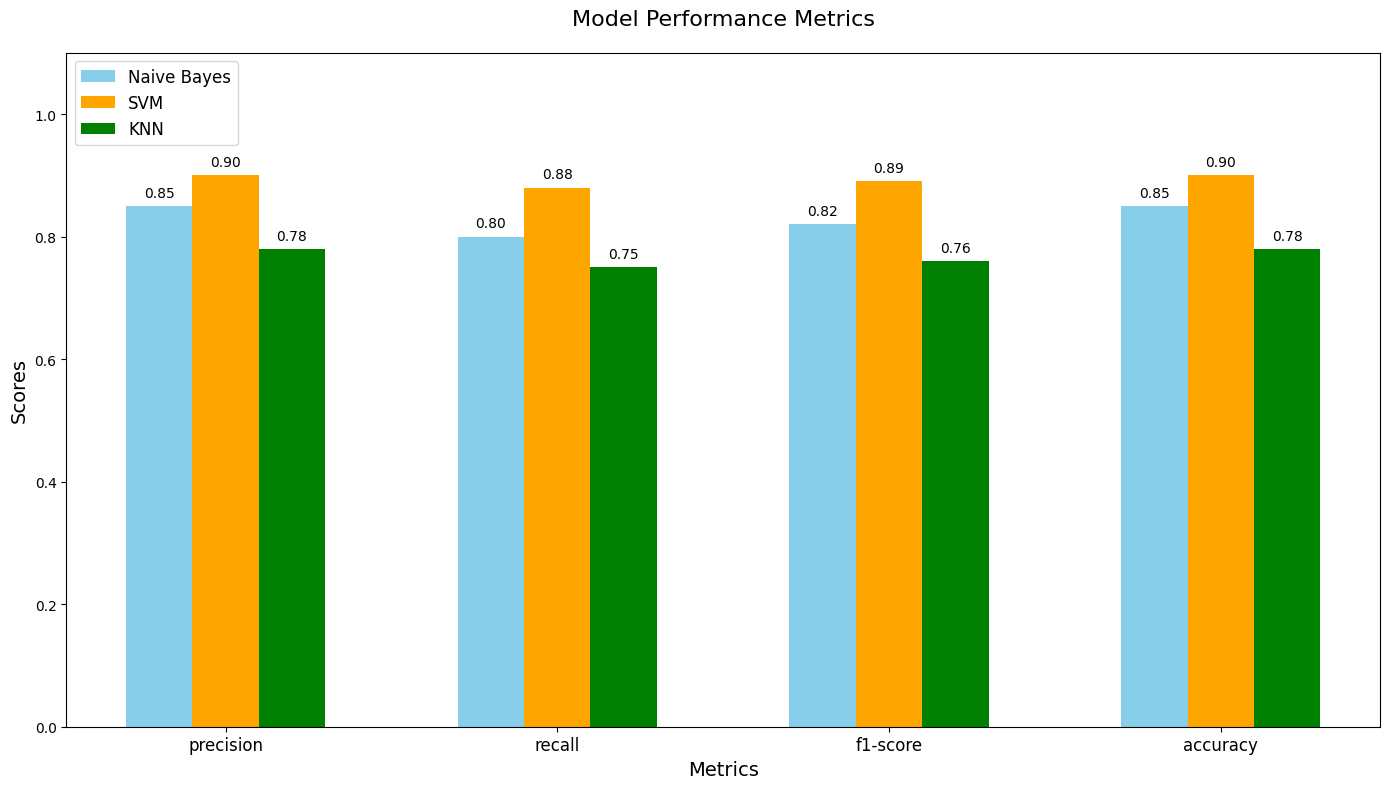

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example results (replace these with actual classification metrics)
results = {
    "Naive Bayes": {
        "precision": 0.85,
        "recall": 0.80,
        "f1-score": 0.82,
        "support": 200,
        "accuracy": 0.85
    },
    "SVM": {
        "precision": 0.90,
        "recall": 0.88,
        "f1-score": 0.89,
        "support": 200,
        "accuracy": 0.90
    },
    "KNN": {
        "precision": 0.78,
        "recall": 0.75,
        "f1-score": 0.76,
        "support": 200,
        "accuracy": 0.78
    }
}

# Convert results to DataFrame for easy manipulation
metrics = ["precision", "recall", "f1-score", "accuracy"]
data = {model: [results[model][metric] for metric in metrics] for model in results}
df = pd.DataFrame(data, index=metrics)

# Print the metrics DataFrame
print("Model Metrics:")
print(df)

# Create grouped bar chart
x = np.arange(len(metrics))  # Metric positions
width = 0.2  # Width of bars
fig, ax = plt.subplots(figsize=(14, 8))  # Larger size for better visibility

# Plot bars for each model
bars1 = ax.bar(x - width, df["Naive Bayes"], width, label="Naive Bayes", color='skyblue')
bars2 = ax.bar(x, df["SVM"], width, label="SVM", color='orange')
bars3 = ax.bar(x + width, df["KNN"], width, label="KNN", color='green')

# Add percentage labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,  # Add slight offset to avoid overlap
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

# Add titles and labels
ax.set_title("Model Performance Metrics", fontsize=16, pad=20)  # Add padding for better spacing
ax.set_xlabel("Metrics", fontsize=14)
ax.set_ylabel("Scores", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12, loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.ylim(0, 1.1)  # Ensure space above the bars for labels
plt.show()
